<a href="https://colab.research.google.com/github/nse4real/myrepo/blob/master/fake_tweet_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#IMPORT NEEDED LIBRARIES
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import re, string, unicodedata, math
import collections as coll

In [3]:
import nltk
nltk.download('stopwords')
#nltk.download('wordnet')
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
from nltk.corpus import words as nltk_words
# Import other models needed for Classification models
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from keras.models import Sequential
#from keras.layers.core import Dense
from sklearn.cluster import KMeans
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from imutils import paths
import argparse
import random
import pickle
import cv2
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
import csv
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from tabulate import tabulate
from matplotlib import style
style.use("ggplot")

In [5]:
#use glob to get all the csv files
# in the folder
#path = os.getcwd()
path= '/content/drive/MyDrive/Colab Notebooks/'
#csv_files = glob.glob(os.path.join(path, "*.csv"))
#print(path)

filepath= '/content/drive/MyDrive/Colab Notebooks/dataset.csv'
print(filepath)

/content/drive/MyDrive/Colab Notebooks/dataset.csv


In [6]:
# read the csv file
df = pd.read_csv(filepath)

# print number df rows and columns
print(df.shape)
  
# print the content
print('Content:')
#display(df)

#print the column names
print(df.columns)
print()

df.head()

(4560, 18)
Content:
Index(['input.access_token', 'input.exclude', 'input.tweet_fields',
       'input.user_id', 'input.pagination_token',
       'data.public_metrics.retweet_count', 'data.public_metrics.reply_count',
       'data.public_metrics.like_count', 'data.public_metrics.quote_count',
       'data.source', 'data.text', 'data.id', 'data.created_at',
       'meta.oldest_id', 'meta.newest_id', 'meta.result_count',
       'meta.next_token', 'meta.previous_token'],
      dtype='object')



,input.access_token,input.exclude,input.tweet_fields,input.user_id,input.pagination_token,data.public_metrics.retweet_count,data.public_metrics.reply_count,data.public_metrics.like_count,data.public_metrics.quote_count,data.source,data.text,data.id,data.created_at,meta.oldest_id,meta.newest_id,meta.result_count,meta.next_token,meta.previous_token
0,AAAAAAAAAAAAAAAAAAAAAAyUYgEAAAAAYT3ZR%2Bw6cIB8...,"retweets,replies","public_metrics,created_at,text,source",27699224,NaN,0,1,15,0,Twitter for iPhone,"FYI for other authors…this raised $1,460 which...",1498672192766328838,2022-03-01T14:51:09.000Z,1396442583505805316,1498672192766328838,100,7140dibdnow9c7btw3w4sioouy7v4owjrs89d2hqa0yly,NaN
1,AAAAAAAAAAAAAAAAAAAAAAyUYgEAAAAAYT3ZR%2Bw6cIB8...,"retweets,replies","public_metrics,created_at,text,source",27699224,NaN,2,4,66,0,Twitter for iPhone,"Twenty years from now, this is gonna read like...",1498655705351479296,2022-03-01T13:45:38.000Z,1396442583505805316,1498672192766328838,100,7140dibdnow9c7btw3w4sioouy7v4owjrs89d2hqa0yly,NaN
2,AAAAAAAAAAAAAAAAAAAAAAyUYgEAAAAAYT3ZR%2Bw6cIB8...,"retweets,replies","public_metrics,created_at,text,source",27699224,NaN,7,3,67,1,Twitter for iPhone,If you donate $20 or more to @WCKitchen and DM...,1498048242336120832,2022-02-27T21:31:48.000Z,1396442583505805316,1498672192766328838,100,7140dibdnow9c7btw3w4sioouy7v4owjrs89d2hqa0yly,NaN
3,AAAAAAAAAAAAAAAAAAAAAAyUYgEAAAAAYT3ZR%2Bw6cIB8...,"retweets,replies","public_metrics,created_at,text,source",27699224,NaN,0,1,23,1,Twitter Web App,Our long international nightmare is just begin...,1496922333512351744,2022-02-24T18:57:50.000Z,1396442583505805316,1498672192766328838,100,7140dibdnow9c7btw3w4sioouy7v4owjrs89d2hqa0yly,NaN
4,AAAAAAAAAAAAAAAAAAAAAAyUYgEAAAAAYT3ZR%2Bw6cIB8...,"retweets,replies","public_metrics,created_at,text,source",27699224,NaN,0,0,20,0,Twitter for iPhone,Nostalgia. https://t.co/oh9hsNGL0U,1495551477057732609,2022-02-21T00:10:32.000Z,1396442583505805316,1498672192766328838,100,7140dibdnow9c7btw3w4sioouy7v4owjrs89d2hqa0yly,NaN


In [7]:
#DROP UNNECCESSARY COLUMNS
columns_to_drop = ['input.access_token', 'input.exclude',
       'input.tweet_fields', 'input.pagination_token', 'meta.oldest_id',
       'meta.newest_id', 'meta.result_count', 'meta.next_token',
       'meta.previous_token']
df=df.drop(columns=columns_to_drop)
print(df.columns)
df.head(42)

Index(['input.user_id', 'data.public_metrics.retweet_count',
       'data.public_metrics.reply_count', 'data.public_metrics.like_count',
       'data.public_metrics.quote_count', 'data.source', 'data.text',
       'data.id', 'data.created_at'],
      dtype='object')


,input.user_id,data.public_metrics.retweet_count,data.public_metrics.reply_count,data.public_metrics.like_count,data.public_metrics.quote_count,data.source,data.text,data.id,data.created_at
0,27699224,0,1,15,0,Twitter for iPhone,"FYI for other authors…this raised $1,460 which...",1498672192766328838,2022-03-01T14:51:09.000Z
1,27699224,2,4,66,0,Twitter for iPhone,"Twenty years from now, this is gonna read like...",1498655705351479296,2022-03-01T13:45:38.000Z
2,27699224,7,3,67,1,Twitter for iPhone,If you donate $20 or more to @WCKitchen and DM...,1498048242336120832,2022-02-27T21:31:48.000Z
3,27699224,0,1,23,1,Twitter Web App,Our long international nightmare is just begin...,1496922333512351744,2022-02-24T18:57:50.000Z
4,27699224,0,0,20,0,Twitter for iPhone,Nostalgia. https://t.co/oh9hsNGL0U,1495551477057732609,2022-02-21T00:10:32.000Z
5,27699224,0,3,24,0,Twitter for iPhone,"I don’t know what’s worth bragging about here,...",1495380686009733128,2022-02-20T12:51:53.000Z
6,27699224,3,0,34,0,Twitter for iPhone,Congratulations to @xlorentzen and the cast of...,1493237197109145606,2022-02-14T14:54:25.000Z
7,27699224,0,8,70,0,Twitter for iPhone,"I have broken, had surgery on, sprained, broke...",1490821936070348801,2022-02-07T22:57:02.000Z
8,27699224,3,5,152,1,Twitter for iPhone,The judgement is deafening. https://t.co/5uMsa...,1489834957115731969,2022-02-05T05:35:08.000Z
9,27699224,1,2,57,0,Twitter for iPhone,If we insist on slicing American generations t...,1486802577522143234,2022-01-27T20:45:32.000Z


In [8]:
#RENAME THE COLUMNS NAMES TO SHORTER NAMES
new_columns={'input.user_id':'user_id', 'data.public_metrics.retweet_count':'retweet_count',
       'data.public_metrics.reply_count':'reply_count', 'data.public_metrics.like_count':'like_count',
       'data.public_metrics.quote_count':'quote_count', 'data.source':'tweet_device', 'data.text':'tweet',
       'data.id':'tweet_id', 'data.created_at':'tweet_time'}
df=df.rename(columns=new_columns)
# print(df.head())
print(df.columns)

Index(['user_id', 'retweet_count', 'reply_count', 'like_count', 'quote_count',
       'tweet_device', 'tweet', 'tweet_id', 'tweet_time'],
      dtype='object')


In [9]:
#ADD NEW COLUMN CALLED USERNAME
authors = {
  426044697: "@Shteyngart",
  18903971: "@harlancoben ",
  27699224: "@askanyone",
  17790667: "@megcabot",
  5520952: "@paulocoelho",
  83876527: "@tejucole"
}
#print(authors)

df['username'] = "" #Add an empty column
#df.info()

for id, username in authors.items():
  #print(df[df.user_id==id]);
  df.loc[df.user_id==id, ['username']] = username

#print userid and username columns
print(df[['user_id','username']].head())
print(df.shape)

    user_id    username
0  27699224  @askanyone
1  27699224  @askanyone
2  27699224  @askanyone
3  27699224  @askanyone
4  27699224  @askanyone
(4560, 10)


## DATA CLEANING
- removal of links from tweets
- removal of special characters from tweets
- removal of numbers from tweets

In [10]:
df.describe()

,user_id,retweet_count,reply_count,like_count,quote_count,tweet_id
count,4.560000e+03,4560.000000,4560.000000,4560.000000,4560.000000,4.560000e+03
mean,1.031864e+08,479.116667,38.814035,1893.208114,38.025219,1.192169e+18
std,1.555637e+08,3277.806502,265.834571,12704.063162,292.751279,3.242729e+17
min,5.520952e+06,0.000000,0.000000,0.000000,0.000000,4.767467e+17
25%,1.779067e+07,2.000000,2.000000,40.000000,0.000000,1.125774e+18
50%,2.769922e+07,9.000000,6.000000,97.000000,1.000000,1.308792e+18
75%,8.387653e+07,45.000000,19.000000,399.000000,3.000000,1.418220e+18
max,4.260447e+08,101649.000000,12418.000000,548082.000000,10586.000000,1.499168e+18


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        4560 non-null   int64 
 1   retweet_count  4560 non-null   int64 
 2   reply_count    4560 non-null   int64 
 3   like_count     4560 non-null   int64 
 4   quote_count    4560 non-null   int64 
 5   tweet_device   4560 non-null   object
 6   tweet          4560 non-null   object
 7   tweet_id       4560 non-null   int64 
 8   tweet_time     4560 non-null   object
 9   username       4560 non-null   object
dtypes: int64(6), object(4)
memory usage: 356.4+ KB


In [12]:
# CHECK FOR NAs
df.isnull().sum()

user_id          0
retweet_count    0
reply_count      0
like_count       0
quote_count      0
tweet_device     0
tweet            0
tweet_id         0
tweet_time       0
username         0
dtype: int64

The dataset contains links and non-ASCII characters. There are no  NaN in the dataset but there exists empty tweets.

In [13]:
## preprocessing functions
def remove_URL(tweet):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", tweet)

def remove_numbers(tweet):
  """Remove words with numbers"""
  return re.sub("[0-9]","",tweet)   

def remove_non_ascii(tweet):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', tweet.encode('ascii', 'ignore').decode('utf-8', 'ignore'))

In [14]:
# Use apply function to apply preprocessing
df["tweet"] = df["tweet"].apply(lambda t: remove_URL(t)) #remove urls
df["tweet"] = df["tweet"].apply(lambda t: remove_numbers(t))
df["tweet"] = df["tweet"].apply(lambda t: remove_non_ascii(t))
df["tweet"] = df["tweet"].apply(lambda t: t.strip())
#print(df.shape)

In [15]:
## C0nvert tweet_device and username to categorical type
df["tweet_device"] = df["tweet_device"].astype('category')
df["username"] = df["username"].astype('category')
df["tweet_device_code"] = df["tweet_device"].cat.codes
df["username_code"] = df["username"].cat.codes
ucat = df["username"].values
print(ucat.categories)
print(np.unique(ucat.codes))

Index(['@Shteyngart', '@askanyone', '@harlancoben ', '@megcabot',
       '@paulocoelho', '@tejucole'],
      dtype='object')
[0 1 2 3 4 5]


In [16]:
# CHECK FOR EMPTY TWEET
df_empty_tweet = df[df['tweet'].str.len()<1]
print("Number of empty tweet: "+str(df_empty_tweet.shape[0]))
df_empty_tweet.shape

Number of empty tweet: 159


(159, 12)

In [17]:
# REMOVE EMPTY TWEETS
df2 = df[df['tweet'].str.len()>0]
print("Cleaned dataset size: {0}",df2.shape[0])
print(df2.shape)
df2.head(42)

Cleaned dataset size: {0} 4401
(4401, 12)


,user_id,retweet_count,reply_count,like_count,quote_count,tweet_device,tweet,tweet_id,tweet_time,username,tweet_device_code,username_code
0,27699224,0,1,15,0,Twitter for iPhone,"FYI for other authorsthis raised $, which is a...",1498672192766328838,2022-03-01T14:51:09.000Z,@askanyone,8,1
1,27699224,2,4,66,0,Twitter for iPhone,"Twenty years from now, this is gonna read like...",1498655705351479296,2022-03-01T13:45:38.000Z,@askanyone,8,1
2,27699224,7,3,67,1,Twitter for iPhone,If you donate $ or more to @WCKitchen and DM m...,1498048242336120832,2022-02-27T21:31:48.000Z,@askanyone,8,1
3,27699224,0,1,23,1,Twitter Web App,Our long international nightmare is just begin...,1496922333512351744,2022-02-24T18:57:50.000Z,@askanyone,4,1
4,27699224,0,0,20,0,Twitter for iPhone,Nostalgia.,1495551477057732609,2022-02-21T00:10:32.000Z,@askanyone,8,1
5,27699224,0,3,24,0,Twitter for iPhone,"I dont know whats worth bragging about here, b...",1495380686009733128,2022-02-20T12:51:53.000Z,@askanyone,8,1
6,27699224,3,0,34,0,Twitter for iPhone,Congratulations to @xlorentzen and the cast of...,1493237197109145606,2022-02-14T14:54:25.000Z,@askanyone,8,1
7,27699224,0,8,70,0,Twitter for iPhone,"I have broken, had surgery on, sprained, broke...",1490821936070348801,2022-02-07T22:57:02.000Z,@askanyone,8,1
8,27699224,3,5,152,1,Twitter for iPhone,The judgement is deafening.,1489834957115731969,2022-02-05T05:35:08.000Z,@askanyone,8,1
9,27699224,1,2,57,0,Twitter for iPhone,If we insist on slicing American generations t...,1486802577522143234,2022-01-27T20:45:32.000Z,@askanyone,8,1


## DESCRIPTIVE DATA ANALYSIS


In [18]:
df2.describe()

,user_id,retweet_count,reply_count,like_count,quote_count,tweet_id,tweet_device_code,username_code
count,4.401000e+03,4401.000000,4401.000000,4401.000000,4401.000000,4.401000e+03,4401.000000,4401.000000
mean,1.062827e+08,487.416042,38.482618,1906.300386,38.383549,1.189038e+18,5.497160,2.375369
std,1.572219e+08,3329.984820,268.416740,12878.056611,297.275943,3.282205e+17,2.250162,1.724416
min,5.520952e+06,0.000000,0.000000,0.000000,0.000000,4.767467e+17,0.000000,0.000000
25%,1.779067e+07,2.000000,2.000000,39.000000,0.000000,1.122850e+18,4.000000,1.000000
50%,2.769922e+07,9.000000,6.000000,94.000000,0.000000,1.308830e+18,5.000000,2.000000
75%,8.387653e+07,42.000000,19.000000,371.000000,3.000000,1.418273e+18,8.000000,4.000000
max,4.260447e+08,101649.000000,12418.000000,548082.000000,10586.000000,1.499168e+18,9.000000,5.000000


In [19]:
df2.groupby("username").agg({
    "retweet_count": ['count','min', 'max', 'median', 'std'],
    "reply_count": ['count','min', 'max', 'median', 'std'],
    "like_count": ['count','min', 'max', 'median', 'std'],
    "quote_count": ['count','min', 'max', 'median', 'std']
})

retweet_count                                 reply_count      \
                      count min     max median          std       count min   
username                                                                      
@Shteyngart             840   0   10800    5.0   373.806324         840   0   
@askanyone              761   0    1452    3.0    60.901864         761   0   
@harlancoben            754   0  101649   13.0  3707.241653         754   0   
@megcabot               697   0    1906    2.0   101.307085         697   0   
@paulocoelho            651   5   90466  374.0  7191.707764         651   0   
@tejucole               698   0    1526   30.0   113.402553         698   0   

                                        like_count                      \
                 max median         std      count min     max  median   
username                                                                 
@Shteyngart     1000    7.0   37.155850        840   4   76026    81.0   
@askanyone       128    2.0    8.067927        761   0   10062    66.0   
@harlancoben    1821   18.5   93.360633        754   5  548082   353.0   
@megcabot        119    1.0    8.420293        697   1   14197    49.0   
@paulocoelho   12418   63.0  669.215480        651  71  261561  2829.0   
@tejucole        103    5.0    8.465871        698   0    1294    39.0   

                            quote_count                                
                        std       count min    max median         std  
username                                                               
@Shteyngart     2636.328065         840   0    618    1.0   21.671458  
@askanyone       573.915931         761   0    452    0.0   18.233827  
@harlancoben   19960.701893         754   0   6537    2.0  240.334512  
@megcabot        739.786860         697   0    345    0.0   22.211201  
@paulocoelho   23654.010421         651   0  10586   39.0  696.641256  
@tejucole         95.545226         698   0    104    0.0    3.988841

{'@Shteyngart': 840, '@harlancoben ': 754, '@askanyone': 761, '@megcabot': 697, '@paulocoelho': 651, '@tejucole': 698}


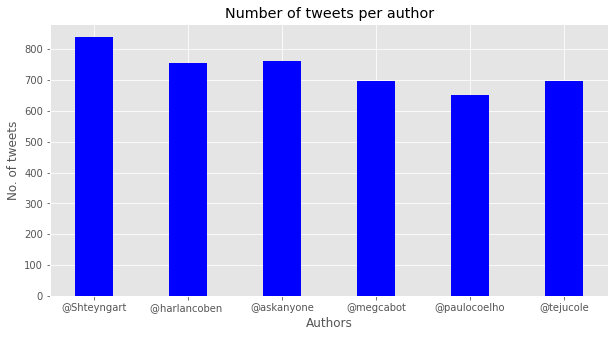

In [20]:
# DISPLAY TOTAL NUMBER OF TWEETS PER AUTHOR
data_dict =  {}
for id, username in authors.items():
  data_dict[username]=df2[df2.user_id==id]['tweet'].count()

print(data_dict)
x = list(data_dict.keys())
y = list(data_dict.values())
  
fig = plt.figure(figsize = (10, 5))
 
# # creating the bar plot
plt.bar(x, y, color ='blue', width = 0.4)
 
plt.xlabel("Authors")
plt.ylabel("No. of tweets")
plt.title("Number of tweets per author")
plt.show()

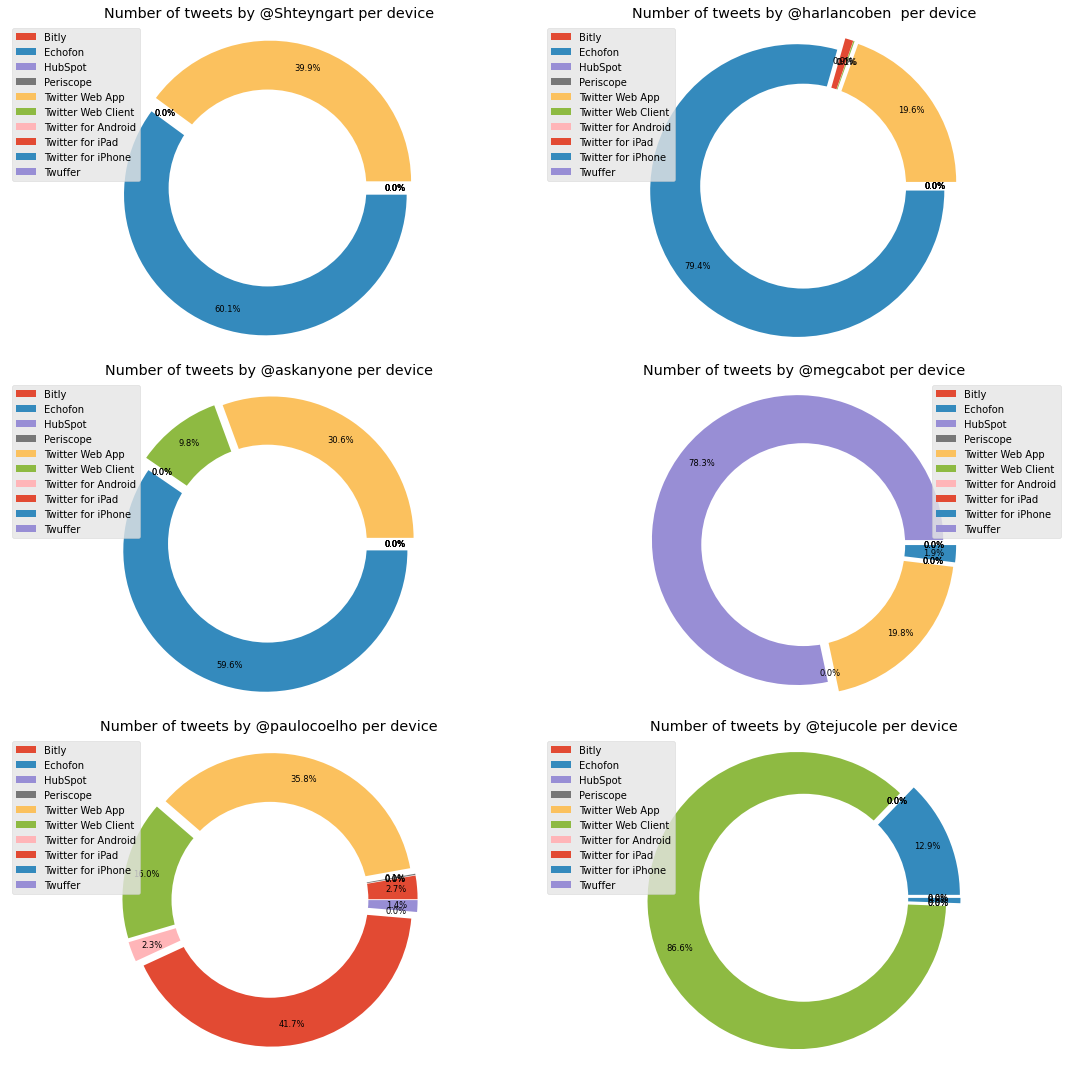

In [21]:
# PLOT TWEET PER DEVICE TYPE PER AUTHOR
i=1;
fig = plt.figure(figsize=(15,15))
for id, username in authors.items():
   data_dict=df[df.user_id==id].groupby(['tweet_device']).count()
   explode_value = np.repeat(0.05, data_dict.index.size)

   fig.add_subplot(3,2,i)
   # Creating plot per auther
   plt.pie(data_dict['tweet'], autopct='%1.1f%%', shadow=False, pctdistance=0.85, explode= explode_value, textprops={'size': 'smaller'})
   # draw circle
   centre_circle = plt.Circle((0, 0), 0.70, fc='white')
   fg = plt.gcf()
  
   # Adding Circle in Pie chart
   fg.gca().add_artist(centre_circle)
   plt.legend(data_dict.index, loc="best")
   plt.title("Number of tweets by "+username+" per device")
   plt.axis('equal')
   i+=1
# show plot
plt.tight_layout()
plt.show()

## Feature Extraction

## Lexical Features

In [22]:
#Dictionary words
dictionary = nltk_words.words();
english_words = set(word.strip().lower() for word in dictionary)

In [23]:
# characters or numbers appearing 3 or more consecutive times in a string  
# Compile the ReGex //"\\b([a-zA-Z0-9])\\1\\1+\\b"
repeating_re = re.compile(r"(.)\1{2,}")
tokenizer = nltk.RegexpTokenizer(r"\w+")

In [24]:
### Lexical and syntactic Feature Extraction
def lexical_feature_extration(tweet):
  tk_no_puntuation = tokenizer.tokenize(tweet) #puntuations are removed
  tk_punctuation = tweet.split(" ") #puntuations remained
  
  # number of words per tweet
  num_words = len(tk_punctuation)

  # number of sentences
  sentences = nltk.sent_tokenize(tweet)
  num_sentences = len(sentences)

  #number of begining words capitalized, #number of punctuation per sentence, #number of uppercase letters
  num__beginning_sent_capital = 0
  num_punct_sent = 0
  num_uppers_sent = 0
  for s in sentences:
    if s[0].isupper():
      num__beginning_sent_capital +=1
    for char in s:
      if char in string.punctuation:
          num_punct_sent +=1
      if char.isupper():
        num_uppers_sent +=1

  # number of words for per sentences
  num_sent_words = [len(s.split(" ")) for s in sentences]
  word_per_sent = sum(num_sent_words)/num_sentences

  #Frequency of dictionary words
  freq_dict_words = sum([1 if word.lower() in english_words else 0 for word in tk_no_puntuation])

  #Frequency of word extensions
  freq_words_ex = sum([1 if re.search(repeating_re, word) else 0 for word in tk_no_puntuation])

  #lexical diversity
  #print(tk_punctuation)
  lex_diversity = len(tk_no_puntuation)/len(set(tk_no_puntuation)) if len(tk_no_puntuation)>0 else 0

  return pd.Series([num_words,num_sentences,word_per_sent,freq_dict_words,freq_words_ex,lex_diversity,
                    num__beginning_sent_capital,num_punct_sent,num_uppers_sent]) 

In [25]:
## Apply lexical and syntactic feature extraction
df2[['num_words','num_sentences','word_per_sent','freq_dict_words','freq_words_ex', 'lex_diversity','num__beginning_sent_capital','num_punct_sent', 'num_uppers_sent']] = df2['tweet'].apply(lexical_feature_extration)

#add columns mimicry_by_length and mimicry_by_word to list
df2['mimicry_by_length'] = np.nan
df2['mimicry_by_word'] = np.nan

#mimicry by length code
#get each authors tweet
for username in authors.values():
  #print(df[df.user_id==id]);
  author_data = df2[df2.username==username]
  #sort it
  author_data.sort_values(by="tweet_time", ascending=False)
  author_tweets = author_data['tweet']
  tweet_index_list = author_tweets.keys()
  #get mimicry length and mimicry by word
  mimicry_length = []
  for i in range(len(tweet_index_list)-1):
      currentKey = tweet_index_list[i]
      nextKey = tweet_index_list[i+1]
      #mimicry by length
      df2.loc[currentKey,'mimicry_by_length'] = len(author_tweets[currentKey])/len(author_tweets[nextKey])
      #mimicry by word
      current_tweet_words = set(tokenizer.tokenize(author_tweets[currentKey]))
      next_tweet_words = set(tokenizer.tokenize(author_tweets[nextKey]))
      df2.loc[currentKey,'mimicry_by_word'] = len(current_tweet_words.intersection(next_tweet_words))
      
  df2.loc[tweet_index_list[-1],'mimicry_by_length'] = 0
  df2.loc[tweet_index_list[-1],'mimicry_by_word'] = 0
  
df2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,user_id,retweet_count,reply_count,like_count,quote_count,tweet_device,tweet,tweet_id,tweet_time,username,...,num_sentences,word_per_sent,freq_dict_words,freq_words_ex,lex_diversity,num__beginning_sent_capital,num_punct_sent,num_uppers_sent,mimicry_by_length,mimicry_by_word
0,27699224,0,1,15,0,Twitter for iPhone,"FYI for other authorsthis raised $, which is a...",1498672192766328838,2022-03-01T14:51:09.000Z,@askanyone,...,2.0,18.5,32.0,0.0,1.058824,2.0,6.0,5.0,2.211111,3.0
1,27699224,2,4,66,0,Twitter for iPhone,"Twenty years from now, this is gonna read like...",1498655705351479296,2022-03-01T13:45:38.000Z,@askanyone,...,1.0,18.0,16.0,0.0,1.058824,1.0,2.0,1.0,0.520231,2.0
2,27699224,7,3,67,1,Twitter for iPhone,If you donate $ or more to @WCKitchen and DM m...,1498048242336120832,2022-02-27T21:31:48.000Z,@askanyone,...,1.0,37.0,32.0,0.0,1.058824,1.0,4.0,19.0,3.392157,0.0
3,27699224,0,1,23,1,Twitter Web App,Our long international nightmare is just begin...,1496922333512351744,2022-02-24T18:57:50.000Z,@askanyone,...,1.0,7.0,7.0,0.0,1.000000,1.0,1.0,1.0,5.100000,0.0
4,27699224,0,0,20,0,Twitter for iPhone,Nostalgia.,1495551477057732609,2022-02-21T00:10:32.000Z,@askanyone,...,1.0,1.0,1.0,0.0,1.000000,1.0,1.0,1.0,0.135135,0.0


### Performing Classification

In [26]:
def balanceData(balanceType, trainX, trainY):
    # ["None", "SMOTE", "RandomOver", "RandomUnder"]
    if balanceType == "None":
        x_train_res = trainX
        y_train_res = trainY
    if balanceType == "SMOTE":
        sm = SMOTE(random_state=12)
        x_train_res, y_train_res = sm.fit_resample(trainX, trainY)
    if balanceType == "RandomOver":
        sm = RandomOverSampler(random_state=12)
        x_train_res, y_train_res = sm.fit_sample(trainX, trainY)
    if balanceType == "RandomUnder":
        sm = RandomUnderSampler(random_state=12)
        x_train_res, y_train_res = sm.fit_sample(trainX, trainY)

    return x_train_res, y_train_res
        
def initNeuralNetModel(trainX, trainY,numFeatures):
    train_Y = np_utils.to_categorical(trainY)
    inputShape = (numFeatures,)
    class_weight1 = {0: 1.,1: 20.}
    y_ints = [y.argmax() for y in train_Y]
    train_classes = np.unique(y_ints)
    num_classes = len(train_classes)
    model = Sequential()
    model.add(Dense(32, input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(Dense(32))
    model.add(Activation("relu"))
    model.add(Dense(num_classes))
    model.add(Activation(tf.nn.softmax))

    #opt = RMSprop(learning_rate=0.0001, decay=1e-6)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    # opt = RMSprop(0.001)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

def doNeuralNetAnalysis(model, trainX, trainY, testX, testY, numFeatures):
    print("Doing analysis with fully connected neural network")
    train_Y = np_utils.to_categorical(trainY)
    test_Y = np_utils.to_categorical(testY)
    inputShape = (numFeatures,)
    class_weight1 = {0: 1.,1: 20.}
    y_ints = [y.argmax() for y in train_Y]
    train_classes = np.unique(y_ints)
    chanDim = 1
    num_classes = len(train_classes)

    # initialize our initial learning rate and # of epochs to train for
    INIT_LR = 0.01
    EPOCHS = 4

    # compile the model using SGD as our optimizer and categorical
    # cross-entropy loss (you'll want to use binary_crossentropy
    # for 2-class classification)
    print("[INFO] training network...")
    # opt = SGD(lr=INIT_LR)
    # model.compile(loss="categorical_crossentropy", optimizer=opt,
    #              metrics=["accuracy"])
    # model.compile(loss='binary_crossentropy',
    #              optimizer=opt,
    #              metrics=[sensitivity, specificity])
    class_weights = compute_class_weight(class_weight = "balanced",classes=train_classes, y = y_ints)
    class_weights = dict(zip(np.unique(train_classes), class_weights))
    #print(class_weights)

    # train the neural network
    model.fit(trainX, train_Y, validation_data=(testX, test_Y),
              epochs=EPOCHS, batch_size=32,
                  class_weight=class_weights, verbose=0)

    # evaluate the network
    print("[INFO] evaluating network...")
    #preds = model.predict(testX, verbose=0)
    #predictions = preds.argmax(axis=1)
    #print(classification_report(testY, predictions,target_names=["0", "1"])
    #print(confusion_matrix(testY, predictions))
    return model

def getClassifierCode(classifierType):
    #["ANN", "SVM", "Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes"]
    code = ""
    if classifierType == "ANN":
        return "ann"
    if classifierType == "SVM":
        return "svm"
    if classifierType == "Decision Tree":
        return "dt"
    if classifierType == "Random Forest":
        return "rf"
    if classifierType == "Naive Bayes":
        return "NB"
    if classifierType == "Logistic Regression":
      return "LR"   

    return code

def getBalanceCode(balanceType):
    #["None", "SMOTE", "RandomOver", "RandomUnder"]
    code = ""
    if balanceType == "None":
        code = '-'
    if balanceType == "SMOTE":
        code = 's'
    if balanceType == "RandomOver":
        code = 'ro'
    if balanceType == "RandomUnder":
        code = 'ru'
    return code

#### Feature Selection

In [27]:
### Need to perform grouping
df2.columns

Index(['user_id', 'retweet_count', 'reply_count', 'like_count', 'quote_count',
       'tweet_device', 'tweet', 'tweet_id', 'tweet_time', 'username',
       'tweet_device_code', 'username_code', 'num_words', 'num_sentences',
       'word_per_sent', 'freq_dict_words', 'freq_words_ex', 'lex_diversity',
       'num__beginning_sent_capital', 'num_punct_sent', 'num_uppers_sent',
       'mimicry_by_length', 'mimicry_by_word'],
      dtype='object')

In [28]:
# We did not consider the non-stylometric feature 'retweet_count', 'reply_count', 'like_count', 'quote_count','tweet_device_code'
data = df2[['num_words', 'num_sentences','word_per_sent','freq_dict_words','freq_words_ex','lex_diversity','mimicry_by_length','mimicry_by_word','num__beginning_sent_capital', 'num_punct_sent', 'num_uppers_sent']]
labels = df2['username_code']
numFeatures = 11

In [29]:
### FEATURE RANKING
### https://machinelearningmastery.com/feature-selection-machine-learning-python/
## ANOVA F-value

# feature extraction
test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(data, labels)
# summarize scores
np.set_printoptions(precision=3)
print("List of Features and the scores\n")

print(tabulate([fit.scores_], headers=data.columns))
print("\n\n\n")

features = fit.transform(data)
# summarize selected features
print(tabulate(features[0:5,:], headers = data.columns))
print("The number of row, columns ",data.shape)

List of Features and the scores

  num_words    num_sentences    word_per_sent    freq_dict_words    freq_words_ex    lex_diversity    mimicry_by_length    mimicry_by_word    num__beginning_sent_capital    num_punct_sent    num_uppers_sent
-----------  ---------------  ---------------  -----------------  ---------------  ---------------  -------------------  -----------------  -----------------------------  ----------------  -----------------
    60.2809          15.5724          59.1764            89.1407          1.79416          8.77267              3.97884            45.2046                        21.7228           11.6433            44.7265




  num_words    num_sentences    word_per_sent    freq_dict_words    freq_words_ex    lex_diversity    mimicry_by_length    mimicry_by_word    num__beginning_sent_capital    num_punct_sent    num_uppers_sent
-----------  ---------------  ---------------  -----------------  ---------------  ---------------  -------------------  --------------

In [30]:
# Open all files for writing everytime the program is ran from the beginning
filenames = ['output.csv','pca-output.csv']
#Header
header = ['Experiment-Number','Grouping-Number','Balance-Code','Classifier-Code','Split-Number','Accuracy','Total-F1','cm']
for outputFilename in filenames:
  # open the file using open() function
  with open(path+outputFilename, 'w', newline='') as f:
      writer = csv.writer(f)
      writer.writerow(header)

test_header = ['Experiment-Number','Grouping-Number','Balance-Code','Classifier-Code','Accuracy','Total-F1','cm']
for outputFilename in filenames:
  name = path+"test-"+outputFilename
  with open(name, 'w', newline='') as f:
      writer = csv.writer(f)
      writer.writerow(test_header)      

In [31]:
# Deal with data imbalance ofter stratified k fold split for cross validation
balanceTypes = ["None", "SMOTE", "RandomOver", "RandomUnder"]
analysisTypes = ["ANN", "SVM", "Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes"]
resultsList = []
testResultList = []

def perform_experiment(groupingCode, experimentNumber, data, labels, outputFilename):  
  #Split the overall dataset into  training and testing
  training_data, testing_data = train_test_split(data, test_size=0.2, random_state=34)
  #training_data = data.sample(frac=0.8, random_state=25)
  training_labels = labels[training_data.index]
  # This test data will be used to evaluate the model
  #testing_data = data.drop(training_data.index)
  testing_labels = labels[testing_data.index]
  #print(testing_labels)

  print(f"No. of training examples: {training_data.shape[0]}")
  print(f"No. of testing examples: {testing_data.shape[0]}")

  models=[initNeuralNetModel(training_data, training_labels,numFeatures),
          SVC(kernel='rbf',gamma="auto"),
          LogisticRegression(random_state=34, C=1, multi_class='auto', solver='lbfgs',max_iter=100),
          DecisionTreeClassifier(criterion="gini", random_state=34, max_depth=5, min_samples_leaf=5),
          RandomForestClassifier(n_estimators=100), GaussianNB()]

  # Running classifiers for balance type = SMOTE
  balanceType = "SMOTE"
  resultsList = []
  testResultList = []
  # Using 5 splits for k-fold cross validation.
  skf = StratifiedKFold(n_splits=4,random_state=25, shuffle=True)
  split = -1
  for train, test in skf.split(training_data, training_labels):
      split = split + 1
      trainX = np.take(training_data, train, axis=0)
      trainY = np.take(training_labels, train, axis=0)
      testX = np.take(training_data, test, axis=0)
      testY = np.take(training_labels, test, axis=0)
      #print("trainX shape:", trainX.shape)
      #print("trainY shape", trainY.shape)

      # deal with the imbalance on the training set alone (so duplication doesn't bleed across test/train split)
      trainX, trainY = balanceData(balanceType, trainX, trainY)

      #print("trainX shape after balancing:", trainX.shape)
      #print("trainY shape after balancing", trainY.shape)
      #trainY = trainY.reshape((trainY.shape[0],))

      for analysisType in analysisTypes:
          print("Doing analysis with {}".format(analysisType))
          if analysisType == "All":
              #print("Doing analysis with Linear Regression")
              #print("But it's not actually implemented...")
              preditions = testY + 1
          else:
              model = None
              if analysisType == "ANN":
                models[0] = doNeuralNetAnalysis(models[0], trainX, trainY,
                                                testX, testY, numFeatures)
                preds = models[0].predict(testX, verbose=0)
                predictions = preds.argmax(axis=1)
                #predictions = doNeuralNetAnalysis(trainX, trainY, testX, testY, numFeatures)
              elif analysisType == "SVM":
                  #svclassifier = SVC(kernel='linear')
                  #svclassifier = SVC(kernel='poly', degree=8)
                  #model = SVC(kernel='rbf', gamma="auto")
                  models[1].fit(trainX, trainY)
                  predictions = models[1].predict(testX)
                  #svclassifier = SVC(kernel='sigmoid')
              elif analysisType == "Logistic Regression":
                  #model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
                  models[2].fit(trainX, trainY)
                  predictions = models[2].predict(testX)   
              elif analysisType == "Decision Tree":
                  #model = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
                  models[3].fit(trainX, trainY)
                  predictions = models[3].predict(testX)
              elif analysisType == "Random Forest":
                  #model = RandomForestClassifier(n_estimators=100)
                  models[4].fit(trainX, trainY)
                  predictions = models[4].predict(testX)
              elif analysisType == "Naive Bayes":
                  #model = GaussianNB()
                  models[5].fit(trainX, trainY)
                  predictions = models[5].predict(testX)
              
              #scores = cross_val_score(model, data, labels, cv=5)
              print(classification_report(testY, predictions))
              cm = confusion_matrix(testY, predictions)
              print(cm)
              accuracy = accuracy_score(testY, predictions)
              print(f"Accuracy: {accuracy}")
              f1s = f1_score(testY, predictions, average=None)
              total_f1s = np.sum(f1s)
              print("Total f1 over classes: {}".format(total_f1s))
              balanceCode = getBalanceCode(balanceType)
              classifierCode = getClassifierCode(analysisType)
              turple = [experimentNumber, groupingCode, balanceCode, classifierCode, split, accuracy, total_f1s,cm.reshape([1,36]).tolist()]
              #print(turple)
              resultsList.append(turple)

  # we use the test dataset
  for i in range(len(models)):
      predictions = []
      print("Doing test analysis with {}".format(analysisTypes[i]))
      if analysisTypes[i] == "ANN":
        preds = models[0].predict(testing_data, verbose=0)
        predictions = preds.argmax(axis=1)
      else:
         predictions = models[i].predict(testing_data)

      #print(predictions)
      print(classification_report(testing_labels, predictions))
      cm = confusion_matrix(testing_labels, predictions)
      print(cm)
      accuracy = accuracy_score(testing_labels, predictions)
      print(f"Accuracy: {accuracy}")
      f1s = f1_score(testing_labels, predictions, average=None)
      total_f1s = np.sum(f1s)
      print("Total f1 over classes: {}".format(total_f1s))
      #featureCode = getFeatureCode(dataFiles, addBorders)
      balanceCode = getBalanceCode(balanceType)
      classifierCode = getClassifierCode(analysisTypes[i])
      turple = [experimentNumber, groupingCode, balanceCode, classifierCode,
                accuracy, total_f1s,cm.reshape([1,36]).tolist()]
      #print(turple)
      testResultList.append(turple)

  #print("****************************************************************")
  #print("EXPERIMENT VALIDATION RESULT")
  #print(tabulate(resultsList, headers = header))
  with open(path+outputFilename, 'a+', newline='') as f:
      writer = csv.writer(f)
      writer.writerows(resultsList)


  #print("****************************************************************")
  #print("EXPERIMENT TEST RESULT")
  #print(tabulate(resultsList, headers = header))
  name = path+"test-"+outputFilename
  with open(name, 'a+', newline='') as f:
      writer = csv.writer(f)
      writer.writerows(testResultList)     

perform_experiment('G-1', 1,data, labels,"output.csv")
perform_experiment('G-1', 2,data, labels,"output.csv")
perform_experiment('G-1', 3,data, labels,"output.csv")
perform_experiment('G-1', 4,data, labels,"output.csv")
perform_experiment('G-1', 5,data, labels,"output.csv")          

No. of training examples: 3520
No. of testing examples: 881
Doing analysis with ANN
Doing analysis with fully connected neural network
[INFO] training network...
[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.34      0.10      0.15       173
           1       0.50      0.44      0.47       151
           2       0.27      0.04      0.07       150
           3       0.29      0.28      0.29       138
           4       0.50      0.40      0.44       128
           5       0.24      0.75      0.36       140

    accuracy                           0.32       880
   macro avg       0.36      0.34      0.30       880
weighted avg       0.36      0.32      0.29       880

[[ 17  18   1  28  13  96]
 [  5  67   1   7  12  59]
 [  9  11   6  32  15  77]
 [ 10  16   8  39   5  60]
 [  3  15   3  16  51  40]
 [  6   7   3  13   6 105]]
Accuracy: 0.32386363636363635
Total f1 over classes: 1.7855532678907267
Doing analysis with SVM
       

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.37      0.19      0.25       173
           1       0.39      0.50      0.44       151
           2       0.29      0.13      0.18       150
           3       0.31      0.20      0.24       138
           4       0.28      0.52      0.37       128
           5       0.29      0.41      0.34       140

    accuracy                           0.32       880
   macro avg       0.32      0.33      0.30       880
weighted avg       0.32      0.32      0.30       880

[[33 38 14 14 42 32]
 [10 76  3  4 30 28]
 [20 18 20 17 37 38]
 [13 27 19 27 28 24]
 [ 6 17  7 11 67 20]
 [ 8 19  7 15 34 57]]
Accuracy: 0.3181818181818182
Total f1 over classes: 1.813416568059178
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.27      0.56      0.36       173
           1       0.48      0.21      0.29       151
           2       0.20      0.17      0.19       150
         

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.28      0.17      0.22       173
           1       0.39      0.57      0.47       152
           2       0.21      0.09      0.13       149
           3       0.33      0.23      0.27       139
           4       0.28      0.52      0.36       128
           5       0.29      0.31      0.30       139

    accuracy                           0.31       880
   macro avg       0.30      0.32      0.29       880
weighted avg       0.30      0.31      0.29       880

[[30 35  7 14 63 24]
 [13 87  9  8 23 12]
 [21 23 14 23 40 28]
 [18 24 20 32 19 26]
 [ 9 23  1 13 67 15]
 [15 30 15  7 29 43]]
Accuracy: 0.31022727272727274
Total f1 over classes: 1.7445086033501562
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.24      0.60      0.34       173
           1       0.34      0.61      0.43       152
           2       0.24      0.05      0.08       149
       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.29      0.16      0.21       172
           1       0.43      0.36      0.39       152
           2       0.32      0.17      0.23       149
           3       0.23      0.22      0.22       139
           4       0.35      0.53      0.42       129
           5       0.31      0.55      0.40       139

    accuracy                           0.32       880
   macro avg       0.32      0.33      0.31       880
weighted avg       0.32      0.32      0.31       880

[[28 25 15 30 27 47]
 [28 54  5 21 17 27]
 [ 8 16 26 28 34 37]
 [12 14 23 30 28 32]
 [ 8 11  3  9 68 30]
 [12  6 10 12 22 77]]
Accuracy: 0.3215909090909091
Total f1 over classes: 1.8599494126811547
Doing analysis with SVM
              precision    recall  f1-score   support

           0       0.27      0.31      0.29       172
           1       0.34      0.52      0.41       152
           2       0.27      0.22      0.24

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.34      0.17      0.22       172
           1       0.41      0.54      0.46       152
           2       0.35      0.15      0.21       149
           3       0.30      0.20      0.24       139
           4       0.30      0.57      0.39       129
           5       0.34      0.46      0.39       139

    accuracy                           0.34       880
   macro avg       0.34      0.35      0.32       880
weighted avg       0.34      0.34      0.32       880

[[29 42  9 21 35 36]
 [17 82  2 13 21 17]
 [10 20 22 19 47 31]
 [12 21 17 28 40 21]
 [ 8 18  4  7 74 18]
 [10 19  8  6 32 64]]
Accuracy: 0.3397727272727273
Total f1 over classes: 1.9211296193794758
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.27      0.51      0.35       172
           1       0.38      0.23      0.29       152
           2       0.20      0.17      0.19       149
        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.26      0.13      0.17       173
           1       0.42      0.55      0.47       152
           2       0.33      0.17      0.23       149
           3       0.33      0.26      0.29       138
           4       0.31      0.58      0.41       128
           5       0.31      0.38      0.34       140

    accuracy                           0.33       880
   macro avg       0.33      0.34      0.32       880
weighted avg       0.33      0.33      0.31       880

[[22 45 19 18 39 30]
 [19 83  2  9 20 19]
 [ 7 22 26 28 37 29]
 [14 14 18 36 33 23]
 [ 6 19  2  9 74 18]
 [16 16 12  9 34 53]]
Accuracy: 0.3340909090909091
Total f1 over classes: 1.9089318915608897
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.23      0.17      0.20       173
           1       0.51      0.28      0.36       152
           2       0.00      0.00      0.00       149
        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.37      0.19      0.25       173
           1       0.39      0.50      0.44       151
           2       0.29      0.13      0.18       150
           3       0.31      0.20      0.24       138
           4       0.28      0.52      0.37       128
           5       0.29      0.41      0.34       140

    accuracy                           0.32       880
   macro avg       0.32      0.33      0.30       880
weighted avg       0.32      0.32      0.30       880

[[33 38 14 14 42 32]
 [10 76  3  4 30 28]
 [20 18 20 17 37 38]
 [13 27 19 27 28 24]
 [ 6 17  7 11 67 20]
 [ 8 19  7 15 34 57]]
Accuracy: 0.3181818181818182
Total f1 over classes: 1.813416568059178
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.27      0.56      0.36       173
           1       0.48      0.21      0.29       151
           2       0.20      0.17      0.19       150
         

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.28      0.17      0.22       173
           1       0.39      0.57      0.47       152
           2       0.21      0.09      0.13       149
           3       0.33      0.23      0.27       139
           4       0.28      0.52      0.36       128
           5       0.29      0.31      0.30       139

    accuracy                           0.31       880
   macro avg       0.30      0.32      0.29       880
weighted avg       0.30      0.31      0.29       880

[[30 35  7 14 63 24]
 [13 87  9  8 23 12]
 [21 23 14 23 40 28]
 [18 24 20 32 19 26]
 [ 9 23  1 13 67 15]
 [15 30 15  7 29 43]]
Accuracy: 0.31022727272727274
Total f1 over classes: 1.7445086033501562
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.24      0.60      0.34       173
           1       0.34      0.61      0.43       152
           2       0.24      0.05      0.08       149
       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.30      0.12      0.17       172
           1       0.43      0.41      0.42       152
           2       0.39      0.11      0.17       149
           3       0.41      0.13      0.20       139
           4       0.36      0.57      0.44       129
           5       0.27      0.73      0.39       139

    accuracy                           0.33       880
   macro avg       0.36      0.34      0.30       880
weighted avg       0.36      0.33      0.29       880

[[ 20  33   8   6  23  82]
 [  6  63   1   4  20  58]
 [ 16  16  16  12  38  51]
 [  9  18  12  18  34  48]
 [  6  11   1   4  74  33]
 [  9   7   3   0  19 101]]
Accuracy: 0.33181818181818185
Total f1 over classes: 1.7869099804636206
Doing analysis with SVM
              precision    recall  f1-score   support

           0       0.27      0.31      0.29       172
           1       0.34      0.52      0.41       152
      

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.34      0.17      0.22       172
           1       0.41      0.54      0.46       152
           2       0.35      0.15      0.21       149
           3       0.30      0.20      0.24       139
           4       0.30      0.57      0.39       129
           5       0.34      0.46      0.39       139

    accuracy                           0.34       880
   macro avg       0.34      0.35      0.32       880
weighted avg       0.34      0.34      0.32       880

[[29 42  9 21 35 36]
 [17 82  2 13 21 17]
 [10 20 22 19 47 31]
 [12 21 17 28 40 21]
 [ 8 18  4  7 74 18]
 [10 19  8  6 32 64]]
Accuracy: 0.3397727272727273
Total f1 over classes: 1.9211296193794758
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.27      0.51      0.35       172
           1       0.38      0.23      0.29       152
           2       0.20      0.17      0.19       149
        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.26      0.13      0.17       173
           1       0.42      0.55      0.47       152
           2       0.33      0.17      0.23       149
           3       0.33      0.26      0.29       138
           4       0.31      0.58      0.41       128
           5       0.31      0.38      0.34       140

    accuracy                           0.33       880
   macro avg       0.33      0.34      0.32       880
weighted avg       0.33      0.33      0.31       880

[[22 45 19 18 39 30]
 [19 83  2  9 20 19]
 [ 7 22 26 28 37 29]
 [14 14 18 36 33 23]
 [ 6 19  2  9 74 18]
 [16 16 12  9 34 53]]
Accuracy: 0.3340909090909091
Total f1 over classes: 1.9089318915608897
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.23      0.17      0.20       173
           1       0.51      0.28      0.36       152
           2       0.00      0.00      0.00       149
        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.37      0.19      0.25       173
           1       0.39      0.50      0.44       151
           2       0.29      0.13      0.18       150
           3       0.31      0.20      0.24       138
           4       0.28      0.52      0.37       128
           5       0.29      0.41      0.34       140

    accuracy                           0.32       880
   macro avg       0.32      0.33      0.30       880
weighted avg       0.32      0.32      0.30       880

[[33 38 14 14 42 32]
 [10 76  3  4 30 28]
 [20 18 20 17 37 38]
 [13 27 19 27 28 24]
 [ 6 17  7 11 67 20]
 [ 8 19  7 15 34 57]]
Accuracy: 0.3181818181818182
Total f1 over classes: 1.813416568059178
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.27      0.56      0.36       173
           1       0.48      0.21      0.29       151
           2       0.20      0.17      0.19       150
         

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.28      0.17      0.22       173
           1       0.39      0.57      0.47       152
           2       0.21      0.09      0.13       149
           3       0.33      0.23      0.27       139
           4       0.28      0.52      0.36       128
           5       0.29      0.31      0.30       139

    accuracy                           0.31       880
   macro avg       0.30      0.32      0.29       880
weighted avg       0.30      0.31      0.29       880

[[30 35  7 14 63 24]
 [13 87  9  8 23 12]
 [21 23 14 23 40 28]
 [18 24 20 32 19 26]
 [ 9 23  1 13 67 15]
 [15 30 15  7 29 43]]
Accuracy: 0.31022727272727274
Total f1 over classes: 1.7445086033501562
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.24      0.60      0.34       173
           1       0.34      0.61      0.43       152
           2       0.24      0.05      0.08       149
       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.32      0.35      0.34       172
           1       0.41      0.51      0.45       152
           2       0.33      0.20      0.25       149
           3       0.33      0.25      0.28       139
           4       0.43      0.59      0.50       129
           5       0.42      0.37      0.40       139

    accuracy                           0.38       880
   macro avg       0.37      0.38      0.37       880
weighted avg       0.37      0.38      0.37       880

[[61 41 18 22 17 13]
 [31 78  6 12 17  8]
 [28 23 30 26 21 21]
 [27 19 21 35 23 14]
 [13 16  3  5 76 16]
 [31 15 12  7 22 52]]
Accuracy: 0.37727272727272726
Total f1 over classes: 2.218973315091173
Doing analysis with SVM
              precision    recall  f1-score   support

           0       0.27      0.31      0.29       172
           1       0.34      0.52      0.41       152
           2       0.27      0.22      0.24

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.34      0.17      0.22       172
           1       0.41      0.54      0.46       152
           2       0.35      0.15      0.21       149
           3       0.30      0.20      0.24       139
           4       0.30      0.57      0.39       129
           5       0.34      0.46      0.39       139

    accuracy                           0.34       880
   macro avg       0.34      0.35      0.32       880
weighted avg       0.34      0.34      0.32       880

[[29 42  9 21 35 36]
 [17 82  2 13 21 17]
 [10 20 22 19 47 31]
 [12 21 17 28 40 21]
 [ 8 18  4  7 74 18]
 [10 19  8  6 32 64]]
Accuracy: 0.3397727272727273
Total f1 over classes: 1.9211296193794758
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.27      0.51      0.35       172
           1       0.38      0.23      0.29       152
           2       0.20      0.17      0.19       149
        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.26      0.13      0.17       173
           1       0.42      0.55      0.47       152
           2       0.33      0.17      0.23       149
           3       0.33      0.26      0.29       138
           4       0.31      0.58      0.41       128
           5       0.31      0.38      0.34       140

    accuracy                           0.33       880
   macro avg       0.33      0.34      0.32       880
weighted avg       0.33      0.33      0.31       880

[[22 45 19 18 39 30]
 [19 83  2  9 20 19]
 [ 7 22 26 28 37 29]
 [14 14 18 36 33 23]
 [ 6 19  2  9 74 18]
 [16 16 12  9 34 53]]
Accuracy: 0.3340909090909091
Total f1 over classes: 1.9089318915608897
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.23      0.17      0.20       173
           1       0.51      0.28      0.36       152
           2       0.00      0.00      0.00       149
        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.37      0.19      0.25       173
           1       0.39      0.50      0.44       151
           2       0.29      0.13      0.18       150
           3       0.31      0.20      0.24       138
           4       0.28      0.52      0.37       128
           5       0.29      0.41      0.34       140

    accuracy                           0.32       880
   macro avg       0.32      0.33      0.30       880
weighted avg       0.32      0.32      0.30       880

[[33 38 14 14 42 32]
 [10 76  3  4 30 28]
 [20 18 20 17 37 38]
 [13 27 19 27 28 24]
 [ 6 17  7 11 67 20]
 [ 8 19  7 15 34 57]]
Accuracy: 0.3181818181818182
Total f1 over classes: 1.813416568059178
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.27      0.56      0.36       173
           1       0.48      0.21      0.29       151
           2       0.20      0.17      0.19       150
         

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.28      0.17      0.22       173
           1       0.39      0.57      0.47       152
           2       0.21      0.09      0.13       149
           3       0.33      0.23      0.27       139
           4       0.28      0.52      0.36       128
           5       0.29      0.31      0.30       139

    accuracy                           0.31       880
   macro avg       0.30      0.32      0.29       880
weighted avg       0.30      0.31      0.29       880

[[30 35  7 14 63 24]
 [13 87  9  8 23 12]
 [21 23 14 23 40 28]
 [18 24 20 32 19 26]
 [ 9 23  1 13 67 15]
 [15 30 15  7 29 43]]
Accuracy: 0.31022727272727274
Total f1 over classes: 1.7445086033501562
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.24      0.60      0.34       173
           1       0.34      0.61      0.43       152
           2       0.24      0.05      0.08       149
       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.31      0.36      0.33       172
           1       0.41      0.49      0.45       152
           2       0.31      0.17      0.22       149
           3       0.30      0.29      0.29       139
           4       0.48      0.37      0.42       129
           5       0.32      0.42      0.37       139

    accuracy                           0.35       880
   macro avg       0.36      0.35      0.35       880
weighted avg       0.35      0.35      0.35       880

[[62 39 17 26  8 20]
 [34 75  4 15  5 19]
 [30 18 25 29 13 34]
 [26 21 17 40 11 24]
 [21 15  9 10 48 26]
 [30 14  8 14 14 59]]
Accuracy: 0.35113636363636364
Total f1 over classes: 2.079803245152723
Doing analysis with SVM
              precision    recall  f1-score   support

           0       0.27      0.31      0.29       172
           1       0.34      0.52      0.41       152
           2       0.27      0.22      0.24

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.34      0.17      0.22       172
           1       0.41      0.54      0.46       152
           2       0.35      0.15      0.21       149
           3       0.30      0.20      0.24       139
           4       0.30      0.57      0.39       129
           5       0.34      0.46      0.39       139

    accuracy                           0.34       880
   macro avg       0.34      0.35      0.32       880
weighted avg       0.34      0.34      0.32       880

[[29 42  9 21 35 36]
 [17 82  2 13 21 17]
 [10 20 22 19 47 31]
 [12 21 17 28 40 21]
 [ 8 18  4  7 74 18]
 [10 19  8  6 32 64]]
Accuracy: 0.3397727272727273
Total f1 over classes: 1.9211296193794758
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.27      0.51      0.35       172
           1       0.38      0.23      0.29       152
           2       0.20      0.17      0.19       149
        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.26      0.13      0.17       173
           1       0.42      0.55      0.47       152
           2       0.33      0.17      0.23       149
           3       0.33      0.26      0.29       138
           4       0.31      0.58      0.41       128
           5       0.31      0.38      0.34       140

    accuracy                           0.33       880
   macro avg       0.33      0.34      0.32       880
weighted avg       0.33      0.33      0.31       880

[[22 45 19 18 39 30]
 [19 83  2  9 20 19]
 [ 7 22 26 28 37 29]
 [14 14 18 36 33 23]
 [ 6 19  2  9 74 18]
 [16 16 12  9 34 53]]
Accuracy: 0.3340909090909091
Total f1 over classes: 1.9089318915608897
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.23      0.17      0.20       173
           1       0.51      0.28      0.36       152
           2       0.00      0.00      0.00       149
        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.37      0.19      0.25       173
           1       0.39      0.50      0.44       151
           2       0.29      0.13      0.18       150
           3       0.31      0.20      0.24       138
           4       0.28      0.52      0.37       128
           5       0.29      0.41      0.34       140

    accuracy                           0.32       880
   macro avg       0.32      0.33      0.30       880
weighted avg       0.32      0.32      0.30       880

[[33 38 14 14 42 32]
 [10 76  3  4 30 28]
 [20 18 20 17 37 38]
 [13 27 19 27 28 24]
 [ 6 17  7 11 67 20]
 [ 8 19  7 15 34 57]]
Accuracy: 0.3181818181818182
Total f1 over classes: 1.813416568059178
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.27      0.56      0.36       173
           1       0.48      0.21      0.29       151
           2       0.20      0.17      0.19       150
         

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.28      0.17      0.22       173
           1       0.39      0.57      0.47       152
           2       0.21      0.09      0.13       149
           3       0.33      0.23      0.27       139
           4       0.28      0.52      0.36       128
           5       0.29      0.31      0.30       139

    accuracy                           0.31       880
   macro avg       0.30      0.32      0.29       880
weighted avg       0.30      0.31      0.29       880

[[30 35  7 14 63 24]
 [13 87  9  8 23 12]
 [21 23 14 23 40 28]
 [18 24 20 32 19 26]
 [ 9 23  1 13 67 15]
 [15 30 15  7 29 43]]
Accuracy: 0.31022727272727274
Total f1 over classes: 1.7445086033501562
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.24      0.60      0.34       173
           1       0.34      0.61      0.43       152
           2       0.24      0.05      0.08       149
       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.32      0.38      0.35       172
           1       0.43      0.49      0.46       152
           2       0.36      0.21      0.27       149
           3       0.28      0.19      0.23       139
           4       0.39      0.40      0.39       129
           5       0.36      0.47      0.41       139

    accuracy                           0.36       880
   macro avg       0.36      0.36      0.35       880
weighted avg       0.36      0.36      0.35       880

[[66 33 11 20 13 29]
 [32 74  2 16 10 18]
 [33 21 32 18 20 25]
 [31 18 26 27 16 21]
 [23 15  9  6 51 25]
 [24 11  9  8 21 66]]
Accuracy: 0.35909090909090907
Total f1 over classes: 2.1039000331224638
Doing analysis with SVM
              precision    recall  f1-score   support

           0       0.27      0.31      0.29       172
           1       0.34      0.52      0.41       152
           2       0.27      0.22      0.2

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.34      0.17      0.22       172
           1       0.41      0.54      0.46       152
           2       0.35      0.15      0.21       149
           3       0.30      0.20      0.24       139
           4       0.30      0.57      0.39       129
           5       0.34      0.46      0.39       139

    accuracy                           0.34       880
   macro avg       0.34      0.35      0.32       880
weighted avg       0.34      0.34      0.32       880

[[29 42  9 21 35 36]
 [17 82  2 13 21 17]
 [10 20 22 19 47 31]
 [12 21 17 28 40 21]
 [ 8 18  4  7 74 18]
 [10 19  8  6 32 64]]
Accuracy: 0.3397727272727273
Total f1 over classes: 1.9211296193794758
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.27      0.51      0.35       172
           1       0.38      0.23      0.29       152
           2       0.20      0.17      0.19       149
        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.26      0.13      0.17       173
           1       0.42      0.55      0.47       152
           2       0.33      0.17      0.23       149
           3       0.33      0.26      0.29       138
           4       0.31      0.58      0.41       128
           5       0.31      0.38      0.34       140

    accuracy                           0.33       880
   macro avg       0.33      0.34      0.32       880
weighted avg       0.33      0.33      0.31       880

[[22 45 19 18 39 30]
 [19 83  2  9 20 19]
 [ 7 22 26 28 37 29]
 [14 14 18 36 33 23]
 [ 6 19  2  9 74 18]
 [16 16 12  9 34 53]]
Accuracy: 0.3340909090909091
Total f1 over classes: 1.9089318915608897
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.23      0.17      0.20       173
           1       0.51      0.28      0.36       152
           2       0.00      0.00      0.00       149
        

### Performing PCA and using it for classification

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale data before applying PCA
#scaling=StandardScaler()
 
# Use fit and transform method
#scaling.fit(data)
#Scaled_data=scaling.transform(data)

# Set the n_components=3
principal=PCA(n_components=11)
principal.fit(data)
pca_data=principal.transform(data)

# summarize components
print("Explained Variance: %s" % principal.explained_variance_ratio_)
print("Shape of Transformed data: ",pca_data.shape)

pca_df = pd.DataFrame(pca_data, columns = ["pc"+str(pci) for pci in range(11)],
                      index = labels.index)
print("PCA data frame has row,columns:", pca_df.shape)


perform_experiment('G-1', 1,pca_df, labels,"pca-output.csv")
perform_experiment('G-1', 2,pca_df, labels,"pca-output.csv")
perform_experiment('G-1', 3,pca_df, labels,"pca-output.csv")
perform_experiment('G-1', 4,pca_df, labels,"pca-output.csv")
perform_experiment('G-1', 5,pca_df, labels,"pca-output.csv")

Explained Variance: [7.448e-01 9.613e-02 6.432e-02 6.106e-02 1.481e-02 1.053e-02 6.517e-03
 1.538e-03 2.309e-04 2.986e-05 2.337e-05]
Shape of Transformed data:  (4401, 11)
PCA data frame has row,columns: (4401, 11)
No. of training examples: 3520
No. of testing examples: 881
Doing analysis with ANN
Doing analysis with fully connected neural network
[INFO] training network...
[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.32      0.14      0.20       173
           1       0.35      0.58      0.44       151
           2       0.28      0.13      0.18       150
           3       0.32      0.21      0.25       138
           4       0.29      0.53      0.38       128
           5       0.31      0.34      0.32       140

    accuracy                           0.32       880
   macro avg       0.31      0.32      0.30       880
weighted avg       0.31      0.32      0.29       880

[[25 52  5 17 40 34]
 [14 88  3  5 27 14]
 [13 19 2

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.36      0.23      0.28       173
           1       0.38      0.50      0.43       151
           2       0.22      0.13      0.16       150
           3       0.30      0.18      0.23       138
           4       0.28      0.52      0.37       128
           5       0.31      0.39      0.35       140

    accuracy                           0.32       880
   macro avg       0.31      0.32      0.30       880
weighted avg       0.31      0.32      0.30       880

[[39 41 17 14 41 21]
 [14 75  6  3 30 23]
 [23 17 19 18 38 35]
 [14 29 22 25 26 22]
 [ 6 16 10 12 66 18]
 [12 20 11 12 31 54]]
Accuracy: 0.3159090909090909
Total f1 over classes: 1.806021440982625
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.25      0.44      0.32       173
           1       0.43      0.32      0.37       151
           2       0.22      0.01      0.03       150
         

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.26      0.20      0.23       173
           1       0.38      0.55      0.45       152
           2       0.19      0.07      0.10       149
           3       0.32      0.22      0.26       139
           4       0.28      0.55      0.37       128
           5       0.32      0.29      0.31       139

    accuracy                           0.31       880
   macro avg       0.29      0.31      0.29       880
weighted avg       0.29      0.31      0.28       880

[[35 35  5 17 61 20]
 [17 83  6  8 24 14]
 [29 23 10 21 45 21]
 [25 26 18 31 17 22]
 [10 24  1 12 70 11]
 [21 28 12  7 30 41]]
Accuracy: 0.3068181818181818
Total f1 over classes: 1.7158815620959298
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.24      0.40      0.30       173
           1       0.41      0.24      0.31       152
           2       0.33      0.01      0.01       149
        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.35      0.28      0.31       172
           1       0.40      0.53      0.46       152
           2       0.37      0.15      0.21       149
           3       0.29      0.20      0.24       139
           4       0.31      0.54      0.39       129
           5       0.34      0.38      0.36       139

    accuracy                           0.34       880
   macro avg       0.34      0.35      0.33       880
weighted avg       0.34      0.34      0.33       880

[[48 41  8 22 30 23]
 [26 81  4 11 15 15]
 [13 21 22 20 47 26]
 [20 21 17 28 32 21]
 [13 19  1  8 70 18]
 [19 21  7  7 32 53]]
Accuracy: 0.3431818181818182
Total f1 over classes: 1.967262416761295
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.30      0.20      0.24       172
           1       0.48      0.19      0.27       152
           2       0.40      0.03      0.05       149
         

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.26      0.23      0.24       173
           1       0.41      0.53      0.47       152
           2       0.33      0.14      0.20       149
           3       0.32      0.24      0.28       138
           4       0.31      0.53      0.40       128
           5       0.33      0.36      0.35       140

    accuracy                           0.33       880
   macro avg       0.33      0.34      0.32       880
weighted avg       0.33      0.33      0.32       880

[[39 42 15 15 32 30]
 [26 81  2  9 20 14]
 [18 20 21 30 34 26]
 [27 14 16 33 30 18]
 [13 22  2  7 68 16]
 [25 17  7  8 32 51]]
Accuracy: 0.33295454545454545
Total f1 over classes: 1.9227326522057968
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.22      0.40      0.28       173
           1       0.41      0.47      0.44       152
           2       0.23      0.18      0.20       149
       

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.36      0.23      0.28       173
           1       0.38      0.50      0.43       151
           2       0.22      0.13      0.16       150
           3       0.30      0.18      0.23       138
           4       0.28      0.52      0.37       128
           5       0.31      0.39      0.35       140

    accuracy                           0.32       880
   macro avg       0.31      0.32      0.30       880
weighted avg       0.31      0.32      0.30       880

[[39 41 17 14 41 21]
 [14 75  6  3 30 23]
 [23 17 19 18 38 35]
 [14 29 22 25 26 22]
 [ 6 16 10 12 66 18]
 [12 20 11 12 31 54]]
Accuracy: 0.3159090909090909
Total f1 over classes: 1.806021440982625
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.25      0.44      0.32       173
           1       0.43      0.32      0.37       151
           2       0.22      0.01      0.03       150
         

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.26      0.20      0.23       173
           1       0.38      0.55      0.45       152
           2       0.19      0.07      0.10       149
           3       0.32      0.22      0.26       139
           4       0.28      0.55      0.37       128
           5       0.32      0.29      0.31       139

    accuracy                           0.31       880
   macro avg       0.29      0.31      0.29       880
weighted avg       0.29      0.31      0.28       880

[[35 35  5 17 61 20]
 [17 83  6  8 24 14]
 [29 23 10 21 45 21]
 [25 26 18 31 17 22]
 [10 24  1 12 70 11]
 [21 28 12  7 30 41]]
Accuracy: 0.3068181818181818
Total f1 over classes: 1.7158815620959298
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.24      0.40      0.30       173
           1       0.41      0.24      0.31       152
           2       0.33      0.01      0.01       149
        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.35      0.28      0.31       172
           1       0.40      0.53      0.46       152
           2       0.37      0.15      0.21       149
           3       0.29      0.20      0.24       139
           4       0.31      0.54      0.39       129
           5       0.34      0.38      0.36       139

    accuracy                           0.34       880
   macro avg       0.34      0.35      0.33       880
weighted avg       0.34      0.34      0.33       880

[[48 41  8 22 30 23]
 [26 81  4 11 15 15]
 [13 21 22 20 47 26]
 [20 21 17 28 32 21]
 [13 19  1  8 70 18]
 [19 21  7  7 32 53]]
Accuracy: 0.3431818181818182
Total f1 over classes: 1.967262416761295
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.30      0.20      0.24       172
           1       0.48      0.19      0.27       152
           2       0.40      0.03      0.05       149
         

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.26      0.23      0.24       173
           1       0.41      0.53      0.47       152
           2       0.33      0.14      0.20       149
           3       0.32      0.24      0.28       138
           4       0.31      0.53      0.40       128
           5       0.33      0.36      0.35       140

    accuracy                           0.33       880
   macro avg       0.33      0.34      0.32       880
weighted avg       0.33      0.33      0.32       880

[[39 42 15 15 32 30]
 [26 81  2  9 20 14]
 [18 20 21 30 34 26]
 [27 14 16 33 30 18]
 [13 22  2  7 68 16]
 [25 17  7  8 32 51]]
Accuracy: 0.33295454545454545
Total f1 over classes: 1.9227326522057968
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.22      0.40      0.28       173
           1       0.41      0.47      0.44       152
           2       0.23      0.18      0.20       149
       

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.36      0.23      0.28       173
           1       0.38      0.50      0.43       151
           2       0.22      0.13      0.16       150
           3       0.30      0.18      0.23       138
           4       0.28      0.52      0.37       128
           5       0.31      0.39      0.35       140

    accuracy                           0.32       880
   macro avg       0.31      0.32      0.30       880
weighted avg       0.31      0.32      0.30       880

[[39 41 17 14 41 21]
 [14 75  6  3 30 23]
 [23 17 19 18 38 35]
 [14 29 22 25 26 22]
 [ 6 16 10 12 66 18]
 [12 20 11 12 31 54]]
Accuracy: 0.3159090909090909
Total f1 over classes: 1.806021440982625
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.25      0.44      0.32       173
           1       0.43      0.32      0.37       151
           2       0.22      0.01      0.03       150
         

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.26      0.20      0.23       173
           1       0.38      0.55      0.45       152
           2       0.19      0.07      0.10       149
           3       0.32      0.22      0.26       139
           4       0.28      0.55      0.37       128
           5       0.32      0.29      0.31       139

    accuracy                           0.31       880
   macro avg       0.29      0.31      0.29       880
weighted avg       0.29      0.31      0.28       880

[[35 35  5 17 61 20]
 [17 83  6  8 24 14]
 [29 23 10 21 45 21]
 [25 26 18 31 17 22]
 [10 24  1 12 70 11]
 [21 28 12  7 30 41]]
Accuracy: 0.3068181818181818
Total f1 over classes: 1.7158815620959298
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.24      0.40      0.30       173
           1       0.41      0.24      0.31       152
           2       0.33      0.01      0.01       149
        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.35      0.28      0.31       172
           1       0.40      0.53      0.46       152
           2       0.37      0.15      0.21       149
           3       0.29      0.20      0.24       139
           4       0.31      0.54      0.39       129
           5       0.34      0.38      0.36       139

    accuracy                           0.34       880
   macro avg       0.34      0.35      0.33       880
weighted avg       0.34      0.34      0.33       880

[[48 41  8 22 30 23]
 [26 81  4 11 15 15]
 [13 21 22 20 47 26]
 [20 21 17 28 32 21]
 [13 19  1  8 70 18]
 [19 21  7  7 32 53]]
Accuracy: 0.3431818181818182
Total f1 over classes: 1.967262416761295
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.30      0.20      0.24       172
           1       0.48      0.19      0.27       152
           2       0.40      0.03      0.05       149
         

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.26      0.23      0.24       173
           1       0.41      0.53      0.47       152
           2       0.33      0.14      0.20       149
           3       0.32      0.24      0.28       138
           4       0.31      0.53      0.40       128
           5       0.33      0.36      0.35       140

    accuracy                           0.33       880
   macro avg       0.33      0.34      0.32       880
weighted avg       0.33      0.33      0.32       880

[[39 42 15 15 32 30]
 [26 81  2  9 20 14]
 [18 20 21 30 34 26]
 [27 14 16 33 30 18]
 [13 22  2  7 68 16]
 [25 17  7  8 32 51]]
Accuracy: 0.33295454545454545
Total f1 over classes: 1.9227326522057968
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.22      0.40      0.28       173
           1       0.41      0.47      0.44       152
           2       0.23      0.18      0.20       149
       

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.36      0.23      0.28       173
           1       0.38      0.50      0.43       151
           2       0.22      0.13      0.16       150
           3       0.30      0.18      0.23       138
           4       0.28      0.52      0.37       128
           5       0.31      0.39      0.35       140

    accuracy                           0.32       880
   macro avg       0.31      0.32      0.30       880
weighted avg       0.31      0.32      0.30       880

[[39 41 17 14 41 21]
 [14 75  6  3 30 23]
 [23 17 19 18 38 35]
 [14 29 22 25 26 22]
 [ 6 16 10 12 66 18]
 [12 20 11 12 31 54]]
Accuracy: 0.3159090909090909
Total f1 over classes: 1.806021440982625
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.25      0.44      0.32       173
           1       0.43      0.32      0.37       151
           2       0.22      0.01      0.03       150
         

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.26      0.20      0.23       173
           1       0.38      0.55      0.45       152
           2       0.19      0.07      0.10       149
           3       0.32      0.22      0.26       139
           4       0.28      0.55      0.37       128
           5       0.32      0.29      0.31       139

    accuracy                           0.31       880
   macro avg       0.29      0.31      0.29       880
weighted avg       0.29      0.31      0.28       880

[[35 35  5 17 61 20]
 [17 83  6  8 24 14]
 [29 23 10 21 45 21]
 [25 26 18 31 17 22]
 [10 24  1 12 70 11]
 [21 28 12  7 30 41]]
Accuracy: 0.3068181818181818
Total f1 over classes: 1.7158815620959298
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.24      0.40      0.30       173
           1       0.41      0.24      0.31       152
           2       0.33      0.01      0.01       149
        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.35      0.28      0.31       172
           1       0.40      0.53      0.46       152
           2       0.37      0.15      0.21       149
           3       0.29      0.20      0.24       139
           4       0.31      0.54      0.39       129
           5       0.34      0.38      0.36       139

    accuracy                           0.34       880
   macro avg       0.34      0.35      0.33       880
weighted avg       0.34      0.34      0.33       880

[[48 41  8 22 30 23]
 [26 81  4 11 15 15]
 [13 21 22 20 47 26]
 [20 21 17 28 32 21]
 [13 19  1  8 70 18]
 [19 21  7  7 32 53]]
Accuracy: 0.3431818181818182
Total f1 over classes: 1.967262416761295
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.30      0.20      0.24       172
           1       0.48      0.19      0.27       152
           2       0.40      0.03      0.05       149
         

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.26      0.23      0.24       173
           1       0.41      0.53      0.47       152
           2       0.33      0.14      0.20       149
           3       0.32      0.24      0.28       138
           4       0.31      0.53      0.40       128
           5       0.33      0.36      0.35       140

    accuracy                           0.33       880
   macro avg       0.33      0.34      0.32       880
weighted avg       0.33      0.33      0.32       880

[[39 42 15 15 32 30]
 [26 81  2  9 20 14]
 [18 20 21 30 34 26]
 [27 14 16 33 30 18]
 [13 22  2  7 68 16]
 [25 17  7  8 32 51]]
Accuracy: 0.33295454545454545
Total f1 over classes: 1.9227326522057968
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.22      0.40      0.28       173
           1       0.41      0.47      0.44       152
           2       0.23      0.18      0.20       149
       

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.36      0.23      0.28       173
           1       0.38      0.50      0.43       151
           2       0.22      0.13      0.16       150
           3       0.30      0.18      0.23       138
           4       0.28      0.52      0.37       128
           5       0.31      0.39      0.35       140

    accuracy                           0.32       880
   macro avg       0.31      0.32      0.30       880
weighted avg       0.31      0.32      0.30       880

[[39 41 17 14 41 21]
 [14 75  6  3 30 23]
 [23 17 19 18 38 35]
 [14 29 22 25 26 22]
 [ 6 16 10 12 66 18]
 [12 20 11 12 31 54]]
Accuracy: 0.3159090909090909
Total f1 over classes: 1.806021440982625
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.25      0.44      0.32       173
           1       0.43      0.32      0.37       151
           2       0.22      0.01      0.03       150
         

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.26      0.20      0.23       173
           1       0.38      0.55      0.45       152
           2       0.19      0.07      0.10       149
           3       0.32      0.22      0.26       139
           4       0.28      0.55      0.37       128
           5       0.32      0.29      0.31       139

    accuracy                           0.31       880
   macro avg       0.29      0.31      0.29       880
weighted avg       0.29      0.31      0.28       880

[[35 35  5 17 61 20]
 [17 83  6  8 24 14]
 [29 23 10 21 45 21]
 [25 26 18 31 17 22]
 [10 24  1 12 70 11]
 [21 28 12  7 30 41]]
Accuracy: 0.3068181818181818
Total f1 over classes: 1.7158815620959298
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.24      0.40      0.30       173
           1       0.41      0.24      0.31       152
           2       0.33      0.01      0.01       149
        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.35      0.28      0.31       172
           1       0.40      0.53      0.46       152
           2       0.37      0.15      0.21       149
           3       0.29      0.20      0.24       139
           4       0.31      0.54      0.39       129
           5       0.34      0.38      0.36       139

    accuracy                           0.34       880
   macro avg       0.34      0.35      0.33       880
weighted avg       0.34      0.34      0.33       880

[[48 41  8 22 30 23]
 [26 81  4 11 15 15]
 [13 21 22 20 47 26]
 [20 21 17 28 32 21]
 [13 19  1  8 70 18]
 [19 21  7  7 32 53]]
Accuracy: 0.3431818181818182
Total f1 over classes: 1.967262416761295
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.30      0.20      0.24       172
           1       0.48      0.19      0.27       152
           2       0.40      0.03      0.05       149
         

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.26      0.23      0.24       173
           1       0.41      0.53      0.47       152
           2       0.33      0.14      0.20       149
           3       0.32      0.24      0.28       138
           4       0.31      0.53      0.40       128
           5       0.33      0.36      0.35       140

    accuracy                           0.33       880
   macro avg       0.33      0.34      0.32       880
weighted avg       0.33      0.33      0.32       880

[[39 42 15 15 32 30]
 [26 81  2  9 20 14]
 [18 20 21 30 34 26]
 [27 14 16 33 30 18]
 [13 22  2  7 68 16]
 [25 17  7  8 32 51]]
Accuracy: 0.33295454545454545
Total f1 over classes: 1.9227326522057968
Doing analysis with Decision Tree
              precision    recall  f1-score   support

           0       0.22      0.40      0.28       173
           1       0.41      0.47      0.44       152
           2       0.23      0.18      0.20       149
       

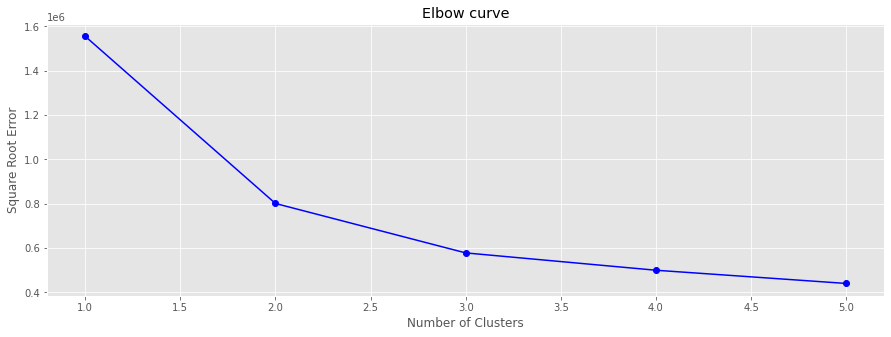

In [33]:
def ElbowMethod(data):
    X = data  # <your_data>
    distorsions = []
    for k in range(1,6):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        distorsions.append(kmeans.inertia_)

    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(1, 6), distorsions, 'bo-')
    plt.grid(True)
    plt.ylabel("Square Root Error")
    plt.xlabel("Number of Clusters")
    plt.title('Elbow curve')
    plt.savefig("ElbowCurve.png")
    plt.show()

ElbowMethod(data)    

labels:  [0 1 0 ... 1 0 0]


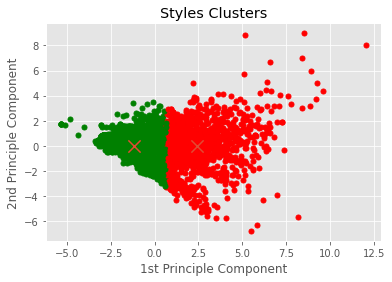

In [34]:
# ANALYSIS PART

# Using the graph shown in Elbow Method, find the appropriate value of K and set it here.
def Analysis(vector, K=2):
    arr = (np.array(vector))

    # mean normalization of the data . converting into normal distribution having mean=0 , -0.1<x<0.1
    sc = StandardScaler()
    x = sc.fit_transform(arr)

    # Breaking into principle components
    pca = PCA(n_components=2)
    components = (pca.fit_transform(x))
    # Applying kmeans algorithm for finding centroids

    kmeans = KMeans(n_clusters=K)
    kmeans.fit_transform(components)
    print("labels: ", kmeans.labels_)
    centers = kmeans.cluster_centers_

    # lables are assigned by the algorithm if 2 clusters then lables would be 0 or 1
    lables = kmeans.labels_
    colors = ["r.", "g.", "b.", "y.", "c.","m.","k."]
    colors = colors[:K + 1]
    #print("colors are: ",len(colors))

    for i in range(len(components)):
        plt.plot(components[i][0], components[i][1], colors[lables[i]], markersize=10)

    plt.scatter(centers[:, 0], centers[:, 1], marker="x", s=150, linewidths=10, zorder=15)
    plt.xlabel("1st Principle Component")
    plt.ylabel("2nd Principle Component")
    title = "Styles Clusters"
    plt.title(title)
    plt.savefig("Results" + ".png")
    plt.show()
Analysis(data)

labels:  [3 4 3 ... 1 5 5]


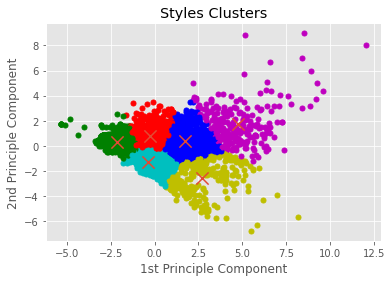

In [35]:
Analysis(data, K=6)